In [463]:
import pandas as pd
import matplotlib.pyplot as plt

In [464]:
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('mode.chained_assignment', None)

### Import dataset

In [465]:
sales_data = pd.read_csv("pc_parts_sales.csv")

### Descriptive statistics

In [466]:
sales_data.head(10)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address_city,purchase_address_country
0,OP89504310,HDD,3.32,61.03,12/12/2023,Chicago,United States
1,IP83558271,Keyboard,4.35,66.18,07/21/2024,Berlin,Germany
2,FW46738968,Case,8.36,308.57,07/15/2024,Mobile,United States
3,HJ32275080,SSD,9.31,135.44,02/14/2024,Wilmington,United States
4,XC48442442,Wireless Adapter,1.89,339.28,07/03/2024,Dillenburg,Germany
5,XA53374264,Power Supply,9.23,NaN,07/12/2024,Carson City,United States
6,YA03838812,Motherboard,4.53,183.58,11/20/2023,Oklahoma City,United States
7,TJ99372180,Microphone,5.16,22.38,12/25/2023,San Jose,United States
8,HW73990535,Cooling Fan,2.73,123.03,04/29/2024,Dresden,Germany
9,CD90844685,Power Supply,1.54,21.14,04/08/2024,Pittsburgh,United States


In [467]:
sales_data.describe()

,quantity_ordered,price_each
count,"1,000.00",927.00
mean,5.48,206.65
std,2.57,110.55
min,1.03,20.85
25%,3.32,109.87
50%,5.45,204.35
75%,7.58,305.52
max,9.99,399.58


### Data cleaning

In [468]:
sales_data_cleaned = sales_data[['product', 'quantity_ordered', 'price_each', 'order_date', 'purchase_address_city', 'purchase_address_country']]
sales_data.head(4)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address_city,purchase_address_country
0,OP89504310,HDD,3.32,61.03,12/12/2023,Chicago,United States
1,IP83558271,Keyboard,4.35,66.18,07/21/2024,Berlin,Germany
2,FW46738968,Case,8.36,308.57,07/15/2024,Mobile,United States
3,HJ32275080,SSD,9.31,135.44,02/14/2024,Wilmington,United States


In [469]:
sales_data_cleaned.isnull().sum()

product                      0
quantity_ordered             0
price_each                  73
order_date                   0
purchase_address_city       67
purchase_address_country    54
dtype: int64

In [470]:
sales_data_cleaned.dropna(inplace=True)

In [471]:
sales_data_cleaned['quantity_ordered'] = sales_data_cleaned['quantity_ordered'].round().astype(int)

In [472]:
sales_data_cleaned['total_price'] = sales_data_cleaned['price_each'] * sales_data_cleaned['quantity_ordered']

In [473]:
sales_data_cleaned['order_date'] = pd.to_datetime(sales_data_cleaned['order_date'])

In [474]:
print(f"Number of dropped rows: {len(sales_data.axes[0]) - len(sales_data_cleaned.axes[0])}")

Number of dropped rows: 184


In [475]:
sales_data_cleaned.isnull().sum()

product                     0
quantity_ordered            0
price_each                  0
order_date                  0
purchase_address_city       0
purchase_address_country    0
total_price                 0
dtype: int64

In [476]:
sales_data_cleaned.head(10)

,product,quantity_ordered,price_each,order_date,purchase_address_city,purchase_address_country,total_price
0,HDD,3,61.03,2023-12-12,Chicago,United States,183.09
1,Keyboard,4,66.18,2024-07-21,Berlin,Germany,264.72
2,Case,8,308.57,2024-07-15,Mobile,United States,"2,468.56"
3,SSD,9,135.44,2024-02-14,Wilmington,United States,"1,218.96"
4,Wireless Adapter,2,339.28,2024-07-03,Dillenburg,Germany,678.56
6,Motherboard,5,183.58,2023-11-20,Oklahoma City,United States,917.90
7,Microphone,5,22.38,2023-12-25,San Jose,United States,111.90
8,Cooling Fan,3,123.03,2024-04-29,Dresden,Germany,369.09
9,Power Supply,2,21.14,2024-04-08,Pittsburgh,United States,42.28
10,Power Supply,7,146.25,2023-10-28,Denton,United States,"1,023.75"


In [477]:
sales_data_cleaned[['quantity_ordered', 'price_each', 'total_price']].describe()

,quantity_ordered,price_each,total_price
count,816.00,816.00,816.00
mean,5.44,204.51,"1,124.81"
std,2.59,110.04,846.21
min,1.00,20.85,23.42
25%,3.00,107.33,410.12
50%,5.00,199.46,922.45
75%,7.00,301.25,"1,654.22"
max,10.00,399.58,"3,843.90"


### Exploratory data analysis

##### Total Revenue Per Month

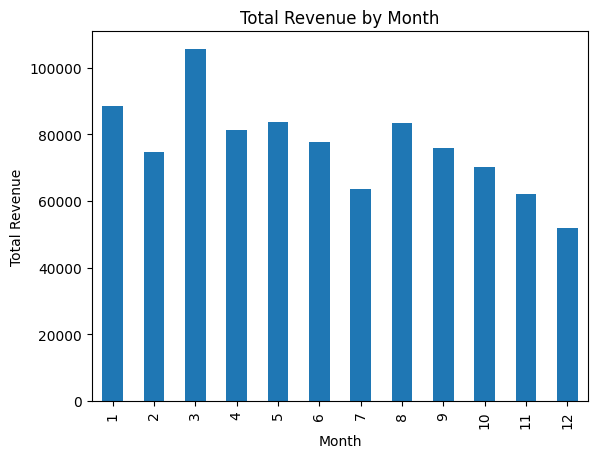

In [478]:
sales_data_cleaned.groupby(sales_data_cleaned['order_date'].dt.month)['total_price'].sum().plot(kind='bar')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()


##### The Best-Selling Product

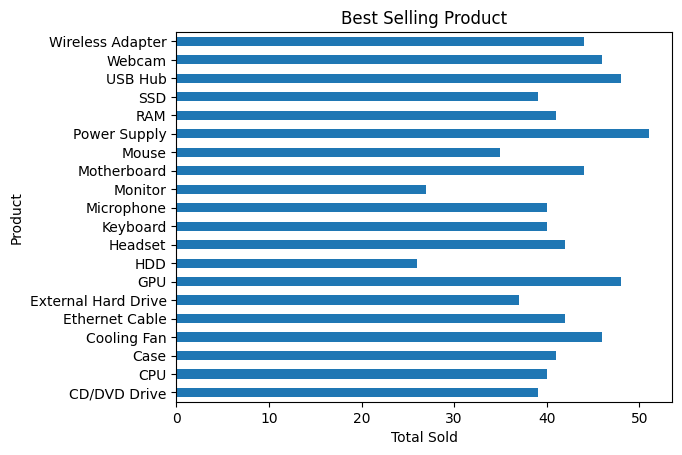

In [479]:
sales_data_cleaned.groupby(sales_data_cleaned['product'])['quantity_ordered'].count().plot(kind='barh')
plt.title("Best Selling Product")
plt.ylabel("Product")
plt.xlabel("Total Sold")
plt.show()


##### Revenue by City

In [497]:
# sales_data_cleaned.groupby(sales_data_cleaned['purchase_address_city'])['total_price'].sum().plot(kind='hist')

# plt.title('Total Revenue by City')
# plt.show()

products = pd.Categorical(sales_data_cleaned['product']).categories.to_list()

##### Revenue by Country

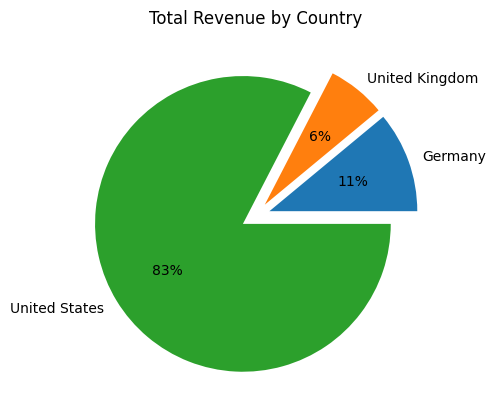

In [480]:
sales_data_cleaned.groupby(sales_data_cleaned['purchase_address_country'])['total_price'].sum().plot(kind='pie', explode=(0.1, 0.1, 0.1) , autopct='%1.0f%%')
plt.title('Total Revenue by Country')
plt.ylabel(None)
plt.show()